# Cropped Image Generator

## 필요모듈 임포트

In [1]:
import cv2
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import re

In [2]:
#-*- encoding: utf8 -*-

## file 불러오기

In [3]:
img_dir = './data/fashion_data/train/원천데이터'
json_dir = './data/fashion_data/train/라벨링데이터'
cropped_dir = './data/fashion_data/cropped'

# Test

In [4]:
# 항목이 같은지 확인
len(os.listdir(img_dir)), len(os.listdir(json_dir))

(23, 23)

In [5]:
import pandas as pd

In [6]:
ls = os.listdir(cropped_dir)

In [7]:
values = []
for i in range(len(ls)):
    values.append(ls[i].split('_')[2:4][0] + '_' + ls[i].split('_')[2:4][1])

In [8]:
dict = {'data':values}
df = pd.DataFrame(dict)

In [9]:
df['data'].value_counts()[df['data'].value_counts()>10743].sort_index()

상의_니트웨어     75204
상의_블라우스    107748
상의_셔츠       50440
상의_탑        51759
상의_티셔츠     190890
상의_후드티      11758
아우터_가디건     28060
아우터_베스트     15781
아우터_재킷      41928
아우터_점퍼      13170
아우터_코트      20806
원피스_드레스    139441
하의_스커트      94716
하의_청바지     131831
하의_팬츠      197874
Name: data, dtype: int64

In [10]:
df['data'].value_counts()

하의_팬츠       197874
상의_티셔츠      190890
원피스_드레스     139441
하의_청바지      131831
상의_블라우스     107748
하의_스커트       94716
상의_니트웨어      75204
상의_탑         51759
상의_셔츠        50440
아우터_재킷       41928
아우터_가디건      28060
아우터_코트       20806
아우터_베스트      15781
아우터_점퍼       13170
상의_후드티       11758
상의_0         10743
하의_0          9481
하의_조거팬츠       6652
아우터_패딩        5960
하의_래깅스        5776
원피스_점프수트      5548
아우터_짚업        5427
아우터_0         3629
원피스_0         2724
상의_브라탑        1578
Name: data, dtype: int64

In [15]:
def count_number(num):
    num += 1
    return num

In [29]:
dict1 = {'상의' : ['탑', '블라우스', '티셔츠', '니트웨어', '셔츠', '브라탑', '후드티']}
len(dict1['상의'])

7

In [51]:
lsls = ['하의_청바지', '하의_팬츠', '하의_스커트', '하의_래깅스', '하의_조거팬츠']
lsls2 = ['아우터_코트', '아우터_재킷','아우터_점퍼','아우터_패딩','아우터_베스트','아우터_가디건','아우터_짚업']
lsls3 = ['원피스_드레스', '원피스_점프수트']

In [52]:
for i in lsls3:
    count = 0
    for v in os.listdir(cropped_dir):
        if v.find(i) != -1:
            count+=1
    print(count)

139441
5548


In [44]:
count = 0
for v in os.listdir(cropped_dir):
    if v.find('하의_래깅스') != -1:
        count+=1
print(count)

5776


In [ ]:
147713

In [3]:
# 세부항목 폴더 이름 리스트 생성
name_ls = os.listdir(img_dir)

In [9]:
len(os.listdir(img_dir + '/'+ '레트로'))

7521

In [10]:
len(os.listdir(json_dir+'/'+'섹시'))

6230

# 진행

### 설명
파일이름 : image_{1}\_{1}\_{category_name}\_{세부이름들}
- 첫번째 {}
    - {'레트로' : 1, '로맨틱' : 2, '리조트' : 3.... } 이런식
- 두번째 {}
    - 이미지 순서 식별자
- category_name
    - 옷 대분류
- 세부이름들 
    - 색상, 서브색상, 카테고리, 소매기장, 소재 등등...

### 설명 추가
`image{number}_{style}_{카테고리}_{서브카테고리}_{컬러}_{서브컬러}_{소재}_{디테일}_{프린트}_{기장}_{소매기장}_{넥라인}_{칼라}_{핏}.jpg`

In [11]:
print(name_ls)

['레트로', '로맨틱', '리조트', '매니시', '모던', '밀리터리', '섹시', '소피스트케이티드', '스트리트', '스포티', '아방가르드', '오리엔탈', '웨스턴', '젠더리스', '컨트리', '클래식', '키치', '톰보이', '펑크', '페미닌', '프레피', '히피', '힙합']


In [3]:
#카테고리 리스트
category_ls = ['카테고리', '색상', '서브색상', '소재', '디테일', '프린트', '기장', '소매기장', '넥라인', '칼라', '핏']

In [4]:
def change_number(ls):
    for i in range(4):
        if ls[i] <= 0:
            ls[i] = 1
    return ls

In [73]:
print(name_ls[:5])
print()

['레트로', '로맨틱', '리조트', '매니시', '모던']

In [12]:
#-*- encoding: utf8 -*-
category_ls = ['카테고리', '색상', '서브색상', '소재', '디테일', '프린트', '기장', '소매기장', '넥라인', '칼라', '핏']
name_ls = os.listdir(img_dir)
image_number = 1
image_sub_number = 1
for i in name_ls :
    
    # 새 directory 만들기
    new_img_dir = img_dir+'/'+i
    new_json_dir = json_dir+'/'+i
    
    # json 경로에서 json 파일 불러와 읽기
    for fn in tqdm(os.listdir(new_json_dir)):
        with open(os.path.join(new_json_dir, fn), 'r', encoding='utf-8') as f:
            json_data = json.load(f)
        
        # json 파일에서 이름을 추출해 img로 만들기
        path = np.fromfile(os.path.join(new_img_dir, json_data['이미지 정보']['이미지 파일명']), np.uint8)
        img = cv2.imdecode(path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        
        # boundingbox 좌표 가져오기
        for category in json_data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'].keys():

            if json_data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'][category] != [{}] :
                sub_data = list(json_data['데이터셋 정보']['데이터셋 상세설명']['라벨링'][category])[0]
                file_name = []

                for j in category_ls:
                    if j in sub_data:
                        string = str(sub_data[j])
                        if (j == '프린트') | (j == '소재'):
                            string =string.replace("\\xa0","_") &nbsp
                            string = re.sub('\/', '_', string)
                            file_name.append(string)
                        else:
                            string = re.sub('\/', '_', string)
                            file_name.append(string)
                    else :
                        file_name.append('0')
                

                rect = list(json_data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'][category][0].values())
                rect = change_number(rect)
                x = int(rect[0])
                y = int(rect[1])
                w = int(rect[2])
                h = int(rect[3])

                cropped_img = img_rgb[y: y + h, x: x + w]


                join_name = '_'.join(file_name)
                img_name = f'image{image_sub_number:07d}_{image_number}_{category}_{join_name}.jpg'


                basename = f'{cropped_dir}/{img_name}'

######################################################################
                try :
                    crop = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
                    extension = os.path.splitext(img_name)[1]
                    result, encoded_img = cv2.imencode(extension, crop)
                
                    if result:
                        with open(basename, mode='w+b') as f:
                            encoded_img.tofile(f)
                except :
                    print(basename)
                    print(fn)
                    

        image_sub_number += 1
    image_number += 1

100%|██████████| 1349/1349 [10:17<00:00,  2.19it/s]


In [10]:
a = 1234
b = f'{a:07d}'
print(b)

0001234


In [26]:
j_data = {
  "이미지 정보": {
    "이미지 식별자": 207138,
    "이미지 높이": 800,
    "이미지 파일명": "Forme_375_37.jpg",
    "이미지 너비": 800
  },
  "데이터셋 정보": {
    "파일 생성일자": "2020-09-07 02:55:21",
    "데이터셋 상세설명": {
      "렉트좌표": {
        "아우터": [
          {
            "X좌표": 114.0,
            "Y좌표": 0.5,
            "가로": 649,
            "세로": 797
          }
        ],
        "하의": [
          {}
        ],
        "원피스": [
          {}
        ],
        "상의": [
          {}
        ]
      },
      "폴리곤좌표": {
        "아우터": [
          {
            "X좌표39": 130.5,
          }
        ],
        "하의": [
          {}
        ],
        "원피스": [
          {}
        ],
        "상의": [
          {}
        ]
      },
      "라벨링": {
        "스타일": [
          {
            "스타일": "프레피",
            "서브스타일": "클래식"
          }
        ],
        "아우터": [
          {
            "기장": "하프",
            "색상": "베이지",
            "서브색상": "와인",
            "카테고리": "재킷",
            "디테일": [
              "더블브레스티드"
            ],
            "소매기장": "긴팔",
            "소재": [
              "트위드"
            ],
            "프린트": [
              "하운즈 투스"
            ],
            "넥라인": "터틀넥",
            "핏": "노멀"
          }
        ],
        "하의": [
          {}
        ],
        "원피스": [
          {}
        ],
        "상의": [
          {}
        ]
      }
    },
    "파일 번호": 207138,
    "파일 이름": "Forme_375_37.jpg"
  }
}

In [60]:
for cc in j_data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'].keys():
    if j_data['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'][cc] != [{}] :
        sub_data = list(j_data['데이터셋 정보']['데이터셋 상세설명']['라벨링'][cc])[0]
        file_name = []

        for j in category_ls:
#             print(j)
            if j in sub_data:
                string = str(sub_data[j])
                if (j == '프린트') | (j == '소재') :
                    string = string.replace("\\xa0", "_")
                    file_name.append(string)
                else : 
                    string = re.sub('\/', '_', string)
                    file_name.append(string)
            else :
                file_name.append('0')
print(file_name)

['재킷', '베이지', '와인', "['트위드']", "['더블브레스티드']", "['하운즈_투스']", '하프', '긴팔', '터틀넥', '0', '노멀']


In [ ]:
img_dir+'/'+'레트로'+'/'+1-(9)-004-271-3031-5163-TOP_179_08.jpg

False

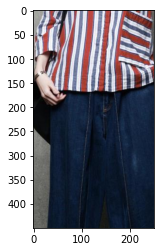

In [17]:
basename = cropped_dir+'/'+'abc.jpg'
abc = cv2.imdecode(np.fromfile(basename, np.uint8), cv2.IMREAD_COLOR)
x = 200
y = 350
h = 450
w = 250
cropped_img = img_rgb[y: y + h, x: x + w]
plt.imshow(cropped_img)
cv2.imwrite(cropped_dir+'/'+'한국.jpg', cropped_img)

### 파일 항목 테스트

In [77]:
import pandas as pd